<a href="https://colab.research.google.com/github/Kat-ies/Coursework/blob/new_pr/ML_methods_face_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Часть 1**
***Решение задачи классификации с использованием методов машинного обучения.***

In [1]:
import random
import numpy as np
from collections import namedtuple
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import namedtuple
from google.colab import drive
from sklearn.externals import joblib 
from PIL import Image, ImageDraw

# подключение гугл-диска
drive.mount('/content/drive')

PATH = '/content/drive/My Drive/Курсач/files/'
RANDOM_SEED = 42

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Mounted at /content/drive


In [15]:
#Загрузим всё необходимое
import matplotlib.pyplot as plt
import time
from collections import namedtuple
from sklearn.metrics import accuracy_score
import sklearn.model_selection as sk
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

Faces = namedtuple('Faces', 'img is_face filename rect')
Rectangle = namedtuple('Rectangle', 'x y w h')

all_features = joblib.load(os.path.join(PATH,'all_features.pkl'))
x_test = joblib.load(os.path.join(PATH,'x_test.pkl'))
y_train = joblib.load(os.path.join(PATH,'y_train.pkl'))
y_test = joblib.load(os.path.join(PATH,'y_test.pkl'))
time_df = joblib.load(os.path.join(PATH, 'Dataframes','time_df_part0.pkl'))

features_list = ['Haars features', 'Matrix features','Matrix + PCA features']
col_list = ['logreg_', 'tree_', 'knn_', 'svm_', 'randforest_', 'ada_boost_', 'grad_boost_']
categories = ['hf_train', 'mf_train','pca_train', 'hf_test', 'mf_test', 'pca_test']

print(len(all_features[0]))

#Обучаем алгоритм и пробуем его применить

Теперь у нас есть всё, что необходимо для наших экспериментов. А значит мы можем заняться обучением и проверить, насколько хорошо наш алгоритм обучился:)   
Для обучения будем использовать следующие классические методы:


1.   Логистическая регрессия
2.   Решающее дерево
3.   Метод ближайших соседей
4.   Метод опорных векторов

А также для сравнения возьмём ансамбли:

1.   AdaBoost
2.   Случайный лес
3.   Градиентный бустинг.

Вдобавок ко всему вышеперечисленному я предлагаю засечь время (в сек), затраченное в среднем на обучение и предсказание каждым методом, чтобы определить для нашей задачи следующие вещи: 


*   Самый быстрый метод
*   Самый точный метод
*   "Лучший метод за свои деньги" (оптимальное соотношение точность - время работы)

В принципе при желании ещё можно провести анализ занимаемой памяти обученной модели.






#Примечание
Поскольку мы обучаем сразу несколько разных моделей на больших объёмах данных, будем сохранять наши обученные модели и их результаты предсказаний на всякий случай.

In [ ]:
def training(x_train, y_train, feature_type, time_df, index):
    C = 1.0

    # берём классификаторы
    from sklearn import svm

    classifiers = [LogisticRegression(random_state = RANDOM_SEED),
                     DecisionTreeClassifier(random_state = RANDOM_SEED),
                     KNeighborsClassifier(n_neighbors = 300),
                     svm.LinearSVC(C=C, max_iter = 10000),
                     RandomForestClassifier(random_state = RANDOM_SEED),
                     AdaBoostClassifier(n_estimators = 100, random_state = RANDOM_SEED),
                     GradientBoostingClassifier(n_estimators = 100, random_state = RANDOM_SEED)]

    # обучим классификаторы и сохраним обученные модели
    for i,clf in enumerate(classifiers):
        t0 = time.time()
        clf.fit(x_train, y_train)
        t = time.time()
        time_df.loc[categories[index]][col_list[i]] += (t - t0)/len(x_train)
        joblib.dump(clf, os.path.join(PATH, 'Classificators', col_list[i] + feature_type + '.pkl')) 

In [ ]:
def prediction(x_test, feature_type, df, time_df, index):
    #загружаем модели
    classifiers = []
    for i, clf_names in enumerate(col_list):
        classifiers.append(joblib.load(os.path.join(PATH, 'Classificators', col_list[i] + feature_type + '.pkl')))

    # проверяем способность прогнозирования после обучения
    for i, clf in enumerate(classifiers):
        t0 = time.time()
        df[col_list[i]] = clf.predict(x_test)
        t = time.time()
        time_df.loc[categories[index]][col_list[i]] += (t - t0)/len(x_test)


In [6]:
# подготовим данные для финального анализа
haars_df = pd.DataFrame(columns=col_list)
matrix_df = pd.DataFrame(columns=col_list)
matrix_pca_df = pd.DataFrame(columns=col_list)

training(all_features[0], y_train, 'hf', time_df, 0)
prediction(all_features[3], 'hf', haars_df, time_df, 3)
haars_df.insert(0, 'y_test', y_test)

training(all_features[1], y_train, 'mf', time_df, 1)
prediction(all_features[4], 'mf', matrix_df, time_df, 4)
matrix_df.insert(0, 'y_test', y_test)

training(all_features[2], y_train, 'mf_pca', time_df, 2)
prediction(all_features[5], 'mf_pca', matrix_pca_df, time_df, 5)
matrix_pca_df.insert(0, 'y_test', y_test)

#добавим ещё колонки
haars_df['all'] = round(haars_df[haars_df.columns[1:5]].mean(axis=1))
matrix_df['all'] = round(matrix_df[matrix_df.columns[1:5]].mean(axis=1))
matrix_pca_df['all'] = round(matrix_pca_df[matrix_df.columns[1:5]].mean(axis=1))


In [12]:
#coxpaним датафреймы, чтобы в следующий раз можно было обойтись без обучения
haars_df.to_csv(os.path.join(PATH,'Dataframes','haars_df.csv'))
matrix_df.to_csv(os.path.join(PATH,'Dataframes','matrix_df.csv'))
matrix_pca_df.to_csv(os.path.join(PATH,'Dataframes','matrix_pca_df.csv'))
time_df.to_csv(os.path.join(PATH,'Dataframes','time_df_part1.csv'))

In [9]:
haars_df[:5]

,y_test,logreg_,tree_,knn_,svm_,randforest_,ada_boost_,grad_boost_,all
0,0,0,0,0,0,0,0,0,0.0
1,1,1,0,0,1,0,0,1,0.0
2,1,1,1,1,1,1,1,1,1.0
3,0,1,0,0,1,0,0,0,0.0
4,1,1,1,1,1,1,1,1,1.0


In [10]:
matrix_df[:5]

,y_test,logreg_,tree_,knn_,svm_,randforest_,ada_boost_,grad_boost_,all
0,0,0,0,0,0,0,0,0,0.0
1,1,1,1,1,1,1,1,1,1.0
2,1,1,0,0,1,1,0,1,0.0
3,0,0,0,0,0,0,0,0,0.0
4,1,1,1,1,1,1,1,1,1.0


In [11]:
matrix_pca_df[:5]

,y_test,logreg_,tree_,knn_,svm_,randforest_,ada_boost_,grad_boost_,all
0,0,0,0,0,1,0,0,0,0.0
1,1,1,1,1,1,1,0,1,1.0
2,1,1,1,0,0,1,1,1,0.0
3,0,0,0,0,1,0,1,0,0.0
4,1,1,1,1,1,1,1,1,1.0


# Результаты
Давайте немного проанализируем, что же у нас получилось.

In [16]:
from sklearn.metrics import accuracy_score
from pandas import read_csv

col_list.append('all')

haars_df = read_csv(os.path.join(PATH,'Dataframes','haars_df.csv'), index_col=0)
matrix_df = read_csv(os.path.join(PATH,'Dataframes','matrix_df.csv'), index_col=0)
matrix_pca_df = read_csv(os.path.join(PATH,'Dataframes','matrix_pca_df.csv'), index_col=0)
time_df = read_csv(os.path.join(PATH,'Dataframes','time_df_part1.csv'), index_col=0)
accuracy_df = pd.DataFrame(features_list, index=['1', '2', '3'], columns=['features'])

for i, cols in enumerate(col_list):
    accuracy_df[cols] = [accuracy_score(haars_df['y_test'], haars_df[cols]),accuracy_score(matrix_df['y_test'], matrix_df[cols]),
                         accuracy_score(matrix_pca_df['y_test'], matrix_pca_df[cols])]

accuracy_df[:]

,features,logreg_,tree_,knn_,svm_,randforest_,ada_boost_,grad_boost_,all
1,Haars features,0.730408,0.726510,0.781327,0.731636,0.819961,0.800856,0.808566,0.761501
2,Matrix features,0.757011,0.704906,0.768618,0.753961,0.824155,0.755401,0.795942,0.773151
3,Matrix + PCA features,0.753961,0.693341,0.771668,0.555028,0.816869,0.768449,0.792383,0.762264


In [ ]:
time_df[:]

,logreg_,tree_,knn_,svm_,randforest_,ada_boost_,grad_boost_
hf_train,0.001695,0.001835,0.001680,0.009068,0.002654,0.002629,0.004308
mf_train,0.000123,0.000893,0.000138,0.023109,0.002143,0.004662,0.013027
pca_train,0.000053,0.000278,0.000037,0.008199,0.001519,0.002028,0.005316
hf_test,0.001639,0.001639,0.030248,0.001638,0.001665,0.001674,0.001641
mf_test,0.000017,0.000016,0.108185,0.000018,0.000062,0.000164,0.000021
pca_test,0.000016,0.000015,0.014342,0.000015,0.000043,0.000051,0.000017


# Анализ ошибочных детекций
Попробуем организовать вывод изображений, на которых ошибается каждый из алгоритмов по отдельности. А также посмотрим, на чём ошибается наш "коллективный разум".

Также не будем забывать о том, что признаки Хоара плохо работают для детекции лиц, расположенных под углом. Максимальный угол отклонения мб 30°.

Для каждого типа признаков будет отображено по 4 примера, на которых ошибается каждый из методов (всего $3 * 4 * 8$ примеров). Возможны ошибки двух типов:   


1.   Лицо не распознано
2.   Случайное изображение классифицировано как лицо.



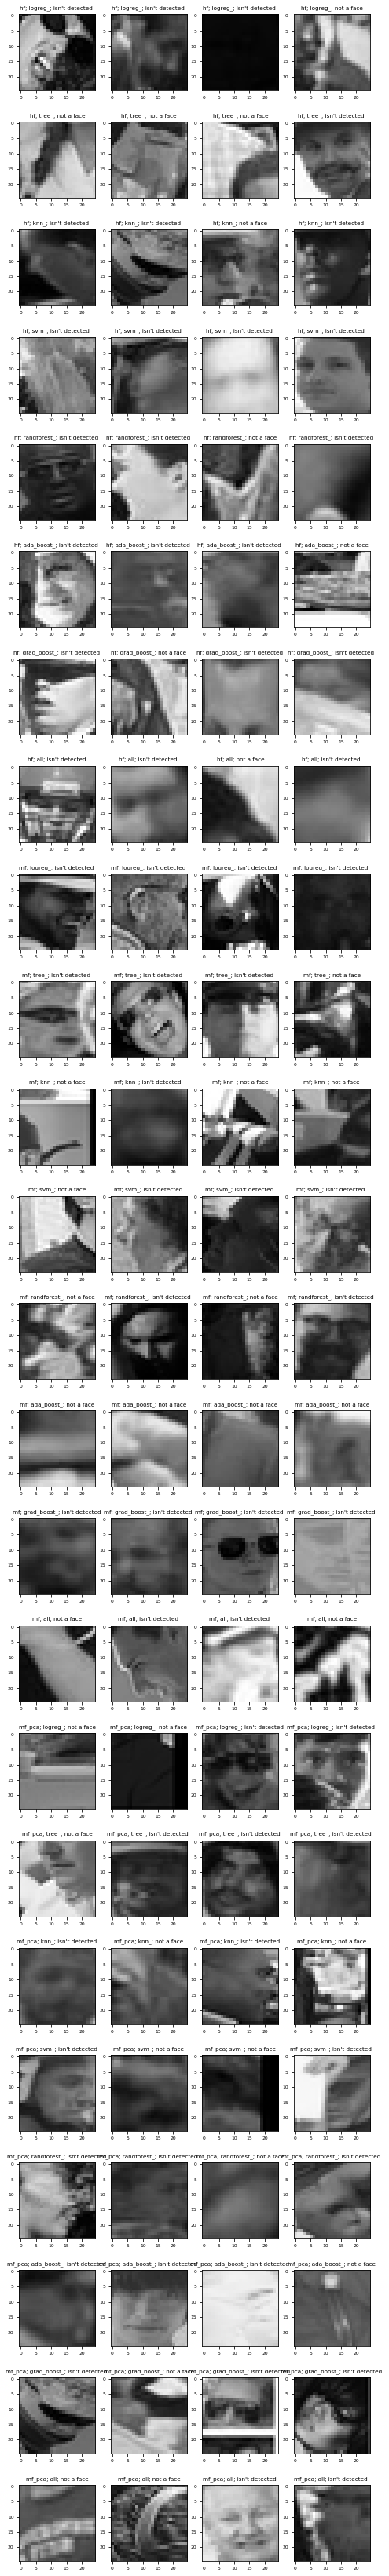

In [17]:
fig = plt.figure(figsize=(8, 60))
COLUMNS = 4
ROWS = 24

# ax enables access to manipulate each of subplots
ax = []
plt.rcParams.update({'font.size': 6})
np.random.seed(RANDOM_SEED)
indexes = np.arange(1,96 ,32)

def plotting(dataframe, feature_type, index):

    for i in range(len(col_list)):
        for j in range(COLUMNS):
            rand_num = np.random.randint(0, len(dataframe))

            while dataframe.iloc[rand_num][col_list[i]] == dataframe.iloc[rand_num]['y_test']:
                rand_num = np.random.randint(0, len(dataframe))

            image = x_test[rand_num].img
            ax.append(fig.add_subplot(ROWS, COLUMNS, index))
            index += 1

            if dataframe.iloc[rand_num]['y_test'] == 0:
                ax[-1].set_title(feature_type + '; ' + col_list[i] + '; not a face')
            else:
                ax[-1].set_title(feature_type + '; ' + col_list[i] + '; isn\'t detected ')
    
            plt.imshow(image, cmap='gray', vmin=0, vmax=255)
        
plotting(haars_df,'hf',indexes[0])
plotting(matrix_df,'mf',indexes[1])
plotting(matrix_pca_df,'mf_pca',indexes[2])


plt.show()  # finally, render the plot